<a href="https://colab.research.google.com/github/FrancescTarres/CA_Practica3/blob/master/Practica3_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 3: Transformaciones Puntuales. 
#Tratamiento automático del Histograma.
## Introducción
En esta práctica nos centraremos en los algoritmos de ecualización de histograma y en otras variantes de procesado basadas en el tratamiento sistemático del histograma. Se trata de técnicas utilizadas muy a menudo en la mejora de imágenes. 

Para ello vamos a trabajar principalmente con las librerias de **scikit-image**, que son unas librearias utilizadas muy a menudo en Python para la programación de aplicaciones de procesado de imágenes. Otras librerías que podrían usarse alternativamente son las OpenCV, que se explorarán en otras prácticas. 

En el transcurso de la práctica iremos viendo distintos tipos de transformaciones sistemáticas del histograma. La característica principal de estas transformaciones es que son automáticas, es decir, no requieren que el usuario especifique directamente la función de transformación sino que existen algoritmos para determinar de forma automática los principales parámetros de la transformación. En general, estos métodos de mejora resultan satisfactorios para la mayor parte de las imágenes ya que, de forma sistemática, intentan aumentar el contraste global y local de la imagen. No obstante, siempre pueden encontrarse contraejemplos de imágenes cuya calidad perceptual se deteriora al aplicar estas transformaciones.

Durante la práctica veremos diferentes tipos de transformaciones automáticas relacionadas con el procesado del histograma:



1.   Ecualización de histograma
2. Tratamiento local del histograma
3. Ecualización adaptativa del histogram

Durante la práctica se realizan diferentes cuestiones que el estudiante debe resolver utilizando ***celdas de texto*** en el cuaderno Jupyter. Para realizar la entrega de la práctica recuerde que a partir del documento Jupyter debe generarse un documento  PDF que incluya sus respuestas y los resultados obtenidos (realice una impresión del documento en formato PDF). No se admite la entrega directa de los cuadernos en Jupyter.


El primer paso a realizar es permitir que el entorno Colaborative de Google tenga acceso a vuestro drive, donde en principio tendréis guardadas las imágenes que debemos procesar en esta práctica.

Para ello debemos ejectuar esta sentencia y definir el directorio desde el cuál trabajaremos. En este caso, deberá modificarse el directorio dentro de os.chir para que coincida con el directorio donde ha almacenado las imágenes correspondientes a esta práctica en su directorio de Drive.

In [3]:
# Preparamos para dar permiso de acceso a Drive a Colab
import os, sys

from google.colab import drive
drive.mount('/content/drive')

os.chdir("/content/drive/My Drive/Colab Notebooks/CA_Practiques/Practica 3")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


En el siguiente apartado cargamos las diferentes librerias de Python que utilizaremos durante la práctica. De scikit images (skimage) importamos los módulos de transformación de imagen (transform), de control de exposición (exposure) y de entrada y salida (io). El primero nos permitirá aplicar diferentes transformaciones puntuales, el segundo incluye algunas técnicas de control de la exposición como la ecualiación de imágenes y el tercero es un módulo de utilizad para abrir y cerrar ficheros de imagen, representarlos, etc.

In [0]:
# Cargamos las principales librerias que utilizaremos en esta práctica
from skimage import exposure as exp
#from skimage.exposure import match_histograms
from skimage import transform as trf
from skimage import io

import matplotlib.pyplot as plt
import numpy as np

# Ecualización Básica

A continuación abrimos una imagen, la normalizamos y la visualizamos. (Nota: obsérvese que el proceso es totalmente paralelo a Matlab). Los módulos de imagen ***imread*** y ***imshow*** se usan para leer imágenes y representarlas en pantalla. Si se deseara escribir una imagen en disco debería aplicarse la función ***imwrite***


0.2549019607843137


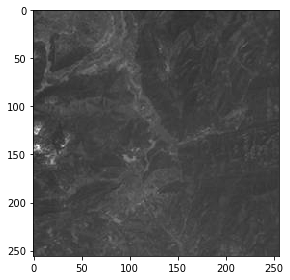

In [5]:
a=io.imread('Imagen2.jpg')
a=a/255
print(a[1,1])
io.imshow(a)

La función de ***skimages.exposure*** que ecualiza el histograma es equalize_hist, que vamos a aplicar directamente a nuestra imagen, para ver el resultado de la ecualización.

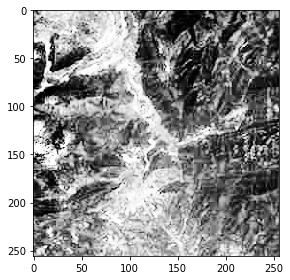

In [6]:
a_eq = exp.equalize_hist(a)
io.imshow(a_eq)

Igual que en Matlab, podemos comparar las dos imágenes en una misma gráfica utilizando las funciones de subplot que están implementadas en ***matplotlib.pyplot***. Las funcionalidades de esta libreria son exactamente iguales a las funcionalidades de Matlab.

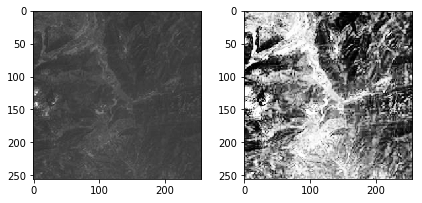

In [7]:
plt.subplot(121)
io.imshow(a)
plt.subplot(122)
io.imshow(a_eq)


Una vez representadas las imágenes podemos ver como son los histogramas de las imágenes original y transformadas utilizando la función ***exposure.histogram*** que permite el cálculo del histograma.

<BarContainer object of 256 artists>

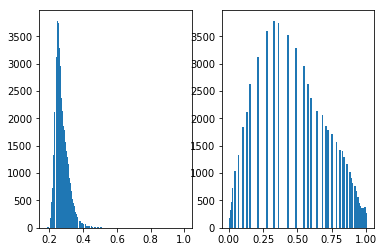

In [8]:
h,bin1=exp.histogram(a)
hq,bin2=exp.histogram(a_eq)

plt.subplot(121)
plt.bar(bin1,h,width=1/250, align='edge')
plt.subplot(122)
plt.bar(bin2,hq,width=1/80,align='edge')


# Cuestiones 1
CUESTIONES.

1.	Indique de forma aproximada los niveles de gris mínimo y máximo de la imagen original a partir de la información obtenida en el histograma.
2.	Indique de forma aproximada los niveles de gris mínimo y máximo de la imagen transformada a partir de la información obtenida en el histograma.
3.	Explique por qué el histograma de la imagen resultante (a_eq) no es perfectamente plano
4.	Explique por qué las barras altas del histograma están más separadas que las barras de menor altura.


# Número de niveles de la imagen ecualizada

En este apartado vamos a reducir el número de niveles de la imagen para posteriormente ecualizarla. Vamos a convertir la imagen en una imagen de 10 niveles. Para ello usamos la siguiente operación, que reduce los niveles de la imagen a los que se especifican en el parámetro ***levels***

In [9]:
levels = 10.
b=np.floor(levels*a)/levels
print(b[5:8,5:8])

[[0.2 0.3 0.3]
 [0.3 0.3 0.3]
 [0.3 0.2 0.2]]


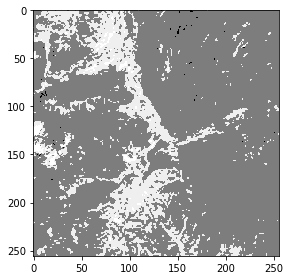

In [10]:
#Procedim a fer l'Equalització automàtica de la imatge amb menys nivells

a_eq=exp.equalize_hist(b,int(levels))
io.imshow(a_eq)


<BarContainer object of 256 artists>

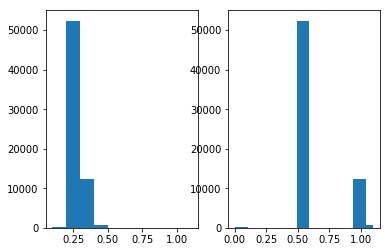

In [11]:
h=exp.histogram(b)
hq=exp.histogram(a_eq)

plt.subplot(121)
plt.bar(h[1],h[0],width=1/10, align='edge')
plt.subplot(122)
plt.bar(hq[1],hq[0],width=1/10,align='edge')

# Cuestiones 2
CUESTIONES
A la vista de los resultados explique:
1. ¿Cuantos niveles 'reales' tiene la imagen original b que ecualizamos? Explique por que no tiene los levels=10 que teóricamente le hemos asoignado.
2. ¿Cuantos niveles tiene la imagen una vez equalizada?
3. ¿Justifique el histograma de la imagen ecualizada teniendo en cuenta el carácter discreto de la imágen

# Representación de la función que ecualiza el histograma

Para calcular la función que ecualiza el histograma podemos realizarlo desde el punto de vista numérico, utilizando la libreria ***numpy*** (numeric Python). La siguiente rutina toma la imagen original 'a' y calcula la función histograma que dispone ***numpy***. No obstante, la función histograma de esta libreria solo admite arrays de 1D. Para convertir la imagen en un array 1D se utiliza el método ***flatten***, que reorganiza la imagen como una secuencia de vectores.
A partir del histograma se calcula la función acumulativa del histograma (ya que, como sabemos, la función que ecualiza el histograma es el histograma acumulado). la última parte del código simplemente realiza una normalización de esta función para que en la representación superpuesta de las dos funciones tengamos los mismos niveles. (No obstante, para aplicar la transformación puntual a la imagen deberíamos normalizar ***cdf*** para que su valor máximo sea la unidad)

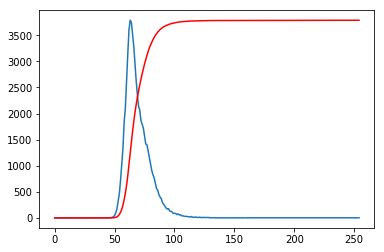

In [12]:
hist,bins=np.histogram(a.flatten(),255,[0,1])
cdf=hist.cumsum()
cdf_n=cdf * float(hist.max())/cdf.max()
plt.plot(255*bins[0:255],hist[0:255])
plt.plot(cdf_n,'r')



Alternativamente, podemos utilizar la libreria skimage para calcular la transformación puntual que ecualiza el histograma. En este caso, la función a utilizar es exp.cummulative_distribution. Su uso se explica en el siguiente fragmento de código

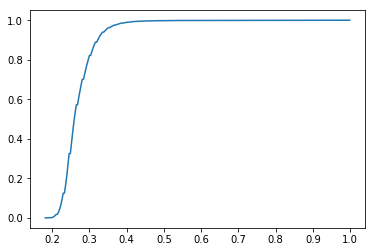

In [13]:
tp, bins = exp.cumulative_distribution(a)
plt.plot(bins,tp)

# Cuestion 3
Se pide que escriba código necesario para implementar las siguientes funcionalidades:

1. Abrir la imagen barco.bmp
2. Normalizar la imagen a la unidad y visualizarla
3. Realizar la ecualización de la imagen y visualizarla
5. Representar los histogramas de las dos imágenes.
6. Representar la función que ecualiza el histograma.

Incluya el código utilizado y las imágenes gráficas obtenidas.

In [0]:
# Escriba aquí su código

# Ecualización de imágenes de naturaleza binaria

Tal y como se ha comentado en clase, la ecualización de imagen puede producir resultados aceptables cuando las imágenes son naturales, que contienen una gran variedad de niveles de gris. No obstante, cuando procesamos imágenes de naturaleza bimodal, la ecualización fuerza que aparezcan todos los niveles de gris y queda el resultado queda muy forzado,

El siguiente código muestra como ejemplo la imagen de una matricula de automóvil, que intentaremos ecualizar y ver su efecto sobre la imagen. 

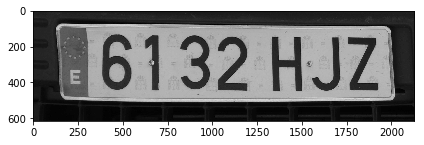

In [15]:
LPlate = io.imread('6132hjz_bw.jpg')
LPlate = LPlate/256
io.imshow(LPlate)

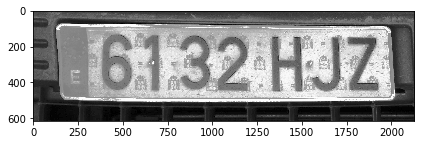

In [16]:
LPlateEq = exp.equalize_hist(LPlate)
io.imshow(LPlateEq)



<BarContainer object of 256 artists>

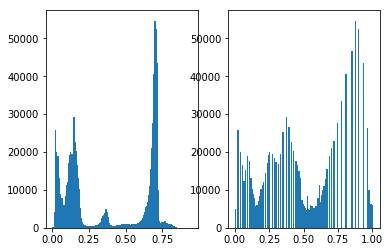

In [17]:
h,bin1=exp.histogram(LPlate)
hq,bin2=exp.histogram(LPlateEq)

plt.subplot(121)
plt.bar(bin1,h,width=1/100, align='edge')
plt.subplot(122)
plt.bar(bin2,hq,width=1/100,align='edge')

# Cuestion 4

Explique brevemente, de forma intuitiva, porqué la imagen ecualizada se ve peor que la imagen original

Escriba aquí su respuesta

# Especificación de histograma

La libreria skimages dispone de una función que permite realizar una especificación de histograma. Realmente, la función realiza un matching de histogramas, es decir, sus parámetros de entrada son 2 imágenes, una de ellas la que debemos procesar y modificar el histograma y otra que es el ejemplo de histograma que deseamos obtener. 

Esencialmente, la función ***transform.match_histogram*** se encarga de procesar una imagen para que su histograma sea 'parecido' al de otra imagen proporcionada como ejemplo. La flexibilidad de esta función es que en la práctica podemos proporcionar una imagen 'real', cuyo histograma queremos copiar, o una imagen sintética, con un hostograma definido por nosotros mismos y que la función intentará, en lo posible, obtener.

Es importante tener en cuenta, que en todos los casos estudiados en esta práctica, estamos trabajando con imágenes reales, discretas, con un número finito de niveles de gris y que por lo tanto, conceptos como la especificación de histograma, que en imágenes analógicas son problemas matemáticamente cerrados, en nuestro caso serán solo aproximaciones.

En el siguiente ejemplo utilizamos la función match_histogram para obtener una simple equalización de histograma con la misma imagen de la matrícula de automóvil que hemos usado anteriormente.

0.2959167764390091


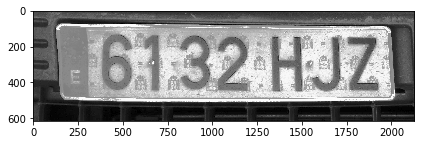

In [18]:
imatch = np.zeros([256,256])
for i in range(256):
  for j in range(256):
    imatch[i,j]=j

LPlateMatch = trf.match_histograms(LPlate,imatch)
LPlateMatch=LPlateMatch/256
print(LPlateMatch[10,10])
io.imshow(LPlateMatch,)

El resultado obtenido es el mismo que en una ecualización. Esto es así debido a que hemos creado una imagen donde todos los niveles de gris tienen la misma densidad, por tanto, al realizar el matching de los histogramas obtenemos una imagen con el histograma plano.

# Cuestión 5
Utilizando el ejemplo anterior se pide que aplique la función match_histograms a la imagen de la matrícula pero ahora generando una imagen de muestra que tenga la mitad de los píxeles repartidos uniformemente entre los niveles 0 y 63 y la otra mitad entre los niveles 192 y 255.
Escriba el código para generar la imagen y la imagen final obtenida.

In [0]:
# Escriba aqui su código


# Cuestión 6
Aplique las técnicas de especificación de histograma para mejorar la imagen Bufalo.jpg que se proporciona junto con los archivos de esta práctica. Explique la especificación de histograma que ha considerado adecuada para mejorar la imagen. Incluya el código utilizado para generar la especificación de la imagen y una representación de la imagen obtenida como resultado final.

In [0]:
# Incluya aquí su código


## Incluya aquí su respuesta



# Ecualización Adaptativa CLAHE

Hemos visto que una de las técnicas más utilizadas para la mejora de imagen es una variante de la ecualización que tiene en cuenta:
1. La ecualización es adaptativa a diferentes regiones de la imagen. Es decir, la imagen se divide en bloques y se aplica una ecualización independiente a cada uno de los bloques. Para evitar el efecto de bloque se aplica una interpolacion entre las diferentes transformaciones puntuales que rodean un pixel, dando mayor o menor importancia en relación a la distancia entre el píxel y el centro de cada uno de los bloques. Este tipo de ecualización se denomina ***AHE (Adaptive Histogram Equalization)***
2. La ecualización AHE puede mejorarse incluyendo la limitación del los picos del histograma. En este caso, se trata de evitar que en las regiones donde el histograma tiene grandes picos, la integración de la función produzca transformaciones puntuales con pendiente muy elevadas, con un contraste excesivo. Por ello, este método aplica una limitación de clipping en las regiones del histograma con amplitudes excesivas. La conjunción de este método con la versión adaptativa da lugar al método ***CLAHE***

La ecualización ***CLAHE*** se proporciona en la libreria ***skimage*** a través del módulo ***exposure.equalizar_adapthist.***

Los parámetros de entrada de este módulo son la imagen a procesar (image), el tamaño de las subimágenes que se usarán para la división en bloques de la imagen (kernel), el valor del límite de clipping que estará normalizado entre 0 y 1, cuanto más próximo a la unidad menos clipping y por lo tanto, obtendremos mayor contraste. (clip_limit). La rutina también permite definir el número de bins con el que se procesa el histograma.

En el siguiente ejemplo cargamos una imagen y aplicamos la técnica de ecualización adaptativa. En este ejemplo, tenga en cuenta que la imagen que cargamos es una imagen de 400x401 píxeles, que dividimos en bloques de [100,100] y que por lo tanto tenemos la imagen dividida en un total de 16 bloques. Tenga también en cuenta que el límite de clipping es bastante bajo (1%), evitando que el contraste aumente excesivamente. Así, si usaramos un nivel de clipping de 1, tendríamos que el procesado se realiza solamente utilizando el métdos ***AHE***

(400, 401)


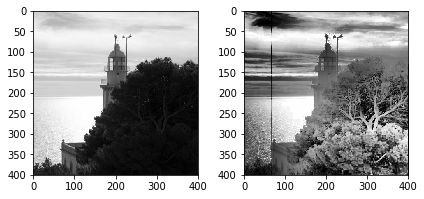

In [47]:
Faro = io.imread('Faro.jpg')
a=np.array(Faro)
print(a.shape)
FaroCLAHE = exp.equalize_adapthist(Faro,kernel_size=[200,200], clip_limit=0.1)
plt.subplot(121)
io.imshow(Faro)
plt.subplot(122)
io.imshow(FaroCLAHE)


#Cuestión 7

Modifique los parámetros de tamaño del kernel y del nivel de clipping hasta obtener una imagen final satisfactoria.

In [0]:
# Escriba aqui sus valores

# Cuestión 8.

1. Tome una fotografía a contraluz con su móvil. Intente que la fotografía aparezca muy contrastada, con regiones muy oscuras y otras muy claras, de manera que pueda ser mejorada aplicando el método CLAHE.
2. Suba la fotografia al directorio de Drive en el que está trabajando.
3. Realice la representación de la imagen original.
4. Aplique una ecualización CLAHE usando los mismos parámetros que ha seleccionado en la cuestión anterior
5. Determine si los parámetros son aceptables (o debe buscar otros valores)
6. Introduzca el código y los resultados en el documento.

In [0]:
# Inroduzca aquí su código